In [1]:

#moving avg window
#datasetdir = "../datasets/allfaultdatasetfiltered13.csv"
figuredir = "../figures/ARIMA/"

import os

# You should change 'test' to your preferred folder.
#CHECK_FOLDER = os.path.isdir(datasetdir)

# You should change 'test' to your preferred folder.
CHECK_FOLDER = os.path.isdir(figuredir)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(figuredir)
    print("created folder : ", figuredir)

else:
    print(figuredir, "folder already exists.")
    

../figures/ARIMA/ folder already exists.


In [2]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,8)

<ipython-input-2-a28677cdb672>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:
Healthy = pd.read_csv('../datasets/filteredlpf/Healthy.csv')
df = Healthy.iloc[0:600]
df

,speed,vibration,vibration_LPF,vibration_SMA,Faults
0,0.036346,0.004049,0.003746,-0.000680,Healthy
1,0.037003,0.003720,0.004234,-0.000562,Healthy
2,0.036346,0.005693,0.004736,-0.000411,Healthy
3,0.036346,0.005035,0.005229,-0.000279,Healthy
4,0.036017,0.005693,0.005689,-0.000128,Healthy
...,...,...,...,...,...
595,0.036346,0.002733,0.002511,0.007094,Healthy
596,0.036017,0.001747,0.002247,0.007008,Healthy
597,0.030757,0.001747,0.002037,0.006929,Healthy
598,0.170157,-0.000555,-0.001201,0.006127,Healthy


In [4]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    mae = mean_absolute_error(test, predictions)
    return mae


In [5]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mae = evaluate_arima_model(dataset, order)
                    if mae < best_score:
                        best_score, best_cfg = mae, order
                    print('ARIMA%s mae=%.5f' % (order,mae))
                except:
                    continue
    print('Best ARIMA%s mae=%.5f' % (best_cfg, best_score))


In [6]:
series = df.vibration_LPF
series.values

array([ 3.74565129e-03,  4.23433990e-03,  4.73559045e-03,  5.22880450e-03,
        5.68921071e-03,  6.12941393e-03,  5.73896289e-03,  5.26989536e-03,
        4.73537966e-03,  4.15511949e-03,  3.55565627e-03,  1.20221845e-03,
        1.35866748e-03,  1.57813370e-03,  1.83089427e-03,  2.08483054e-03,
        2.31070132e-03,  2.48816129e-03,  2.52627705e-03,  2.30742283e-03,
        2.00448927e-03,  1.64130623e-03,  1.25896770e-03,  9.03732142e-04,
        6.12615559e-04,  2.94824730e-04,  3.96880906e-04,  4.87153527e-04,
        4.64237768e-04,  2.94095321e-04,  2.54660434e-05, -6.45257224e-04,
       -4.51507477e-04, -2.42063040e-04, -6.50136829e-06,  2.68208426e-04,
        5.87730235e-04,  9.44085508e-04,  2.19964880e-03,  2.08080583e-03,
        1.96798534e-03,  1.87703268e-03,  1.81194656e-03,  1.76828372e-03,
        1.74007715e-03,  2.63448290e-03,  2.64510592e-03,  2.48927855e-03,
        2.16957486e-03,  1.73349154e-03,  1.26256157e-03,  8.49200917e-04,
        1.68083862e-03,  

In [7]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) mae=0.00474
ARIMA(0, 0, 1) mae=0.00267
ARIMA(0, 0, 2) mae=0.00188
ARIMA(0, 1, 0) mae=0.00070
ARIMA(0, 1, 1) mae=0.00068
ARIMA(0, 1, 2) mae=0.00069
ARIMA(0, 2, 0) mae=0.00083
ARIMA(0, 2, 1) mae=0.00085
ARIMA(0, 2, 2) mae=0.00084
ARIMA(1, 0, 0) mae=0.00075
ARIMA(1, 0, 1) mae=0.00075
ARIMA(1, 0, 2) mae=0.00074
ARIMA(1, 1, 0) mae=0.00067
ARIMA(1, 1, 1) mae=0.00068
ARIMA(1, 1, 2) mae=0.00068
ARIMA(1, 2, 0) mae=0.00088
ARIMA(1, 2, 1) mae=0.00084
ARIMA(1, 2, 2) mae=0.00085
ARIMA(2, 0, 0) mae=0.00075
ARIMA(2, 0, 1) mae=0.00078
ARIMA(2, 0, 2) mae=0.00082
ARIMA(2, 1, 0) mae=0.00068
ARIMA(2, 1, 1) mae=0.00068
ARIMA(2, 1, 2) mae=0.00068
ARIMA(2, 2, 0) mae=0.00089
ARIMA(2, 2, 1) mae=0.00083
ARIMA(2, 2, 2) mae=0.00081
ARIMA(4, 0, 0) mae=0.00078
ARIMA(4, 0, 1) mae=0.00077
ARIMA(4, 0, 2) mae=0.00089
ARIMA(4, 1, 0) mae=0.00068
ARIMA(4, 1, 1) mae=0.00068
ARIMA(4, 1, 2) mae=0.00072
ARIMA(4, 2, 0) mae=0.00088
ARIMA(4, 2, 1) mae=0.00086
ARIMA(4, 2, 2) mae=0.00082
ARIMA(6, 0, 0) mae=0.00080
A

In [8]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
#def parser(x):
#	return datetime.strptime('190'+x, '%Y-%m')
#series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
#series.index = series.index.to_period('M')

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1, 1, 0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
    


predicted=-0.005250, expected=-0.004296
predicted=-0.004475, expected=-0.004866
predicted=-0.005018, expected=-0.005219
predicted=-0.005313, expected=-0.005262
predicted=-0.005274, expected=-0.004961
predicted=-0.004881, expected=-0.004352
predicted=-0.004190, expected=-0.000441
predicted=0.000613, expected=-0.000378
predicted=-0.000362, expected=-0.000254
predicted=-0.000221, expected=-0.000066
predicted=-0.000017, expected=0.000153
predicted=0.000211, expected=0.000351
predicted=0.000404, expected=0.000475
predicted=0.000508, expected=-0.002326
predicted=-0.003065, expected=-0.003213
predicted=-0.003447, expected=-0.004155
predicted=-0.004404, expected=-0.005077
predicted=-0.005323, expected=-0.005887
predicted=-0.006102, expected=-0.006489
predicted=-0.006650, expected=-0.006825
predicted=-0.006915, expected=-0.008163
predicted=-0.008522, expected=-0.008451
predicted=-0.008528, expected=-0.008276
predicted=-0.008229, expected=-0.007536
predicted=-0.007338, expected=-0.006277
predict

In [9]:
history1 = [x for x in train]
predictions1 = list()
# walk-forward validation
for f in range(len(train)):
	model1 = ARIMA(history1, order=(1, 1, 0))
	model_fit1 = model1.fit()
	output1 = model_fit1.forecast()
	yhat1 = output1[0]
	predictions1.append(yhat1)
	obs1 = train[f]
	history1.append(obs1)
	print('predicted1=%f, expected1=%f' % (yhat1, obs1))    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)

rmse1 = sqrt(mean_squared_error(train, predictions1))
mae1 = mean_absolute_error(train, predictions1)

print('Train RMSE: %.5f' % rmse)
print('Train MAE: %.5f' % mae)
print('Train RMSE: %.5f' % rmse1)
print('Train MAE: %.5f' % mae1)


predicted1=-0.005250, expected1=0.003746
predicted1=0.005193, expected1=0.004234
predicted1=0.004326, expected1=0.004736
predicted1=0.004829, expected1=0.005229
predicted1=0.005321, expected1=0.005689
predicted1=0.005776, expected1=0.006129
predicted1=0.006212, expected1=0.005739
predicted1=0.005666, expected1=0.005270
predicted1=0.005182, expected1=0.004735
predicted1=0.004635, expected1=0.004155
predicted1=0.004046, expected1=0.003556
predicted1=0.003442, expected1=0.001202
predicted1=0.000753, expected1=0.001359
predicted1=0.001388, expected1=0.001578
predicted1=0.001620, expected1=0.001831
predicted1=0.001879, expected1=0.002085
predicted1=0.002133, expected1=0.002311
predicted1=0.002353, expected1=0.002488
predicted1=0.002522, expected1=0.002526
predicted1=0.002533, expected1=0.002307
predicted1=0.002266, expected1=0.002004
predicted1=0.001947, expected1=0.001641
predicted1=0.001573, expected1=0.001259
predicted1=0.001187, expected1=0.000904
predicted1=0.000836, expected1=0.000613

predicted1=0.006690, expected1=0.006757
predicted1=0.006769, expected1=0.006895
predicted1=0.006925, expected1=0.007059
predicted1=0.007095, expected1=0.007187
predicted1=0.007215, expected1=0.004864
predicted1=0.004358, expected1=0.004246
predicted1=0.004111, expected1=0.003516
predicted1=0.003357, expected1=0.002651
predicted1=0.002461, expected1=0.001645
predicted1=0.001424, expected1=0.000524
predicted1=0.000278, expected1=-0.000656
predicted1=-0.000918, expected1=-0.006285
predicted1=-0.007566, expected1=-0.006582
predicted1=-0.006648, expected1=-0.006730
predicted1=-0.006763, expected1=-0.006695
predicted1=-0.006687, expected1=-0.006460
predicted1=-0.006408, expected1=-0.006048
predicted1=-0.005956, expected1=-0.005520
predicted1=-0.005403, expected1=-0.004131
predicted1=-0.003820, expected1=-0.003914
predicted1=-0.003866, expected1=-0.003535
predicted1=-0.003450, expected1=-0.003025
predicted1=-0.002911, expected1=-0.002439
predicted1=-0.002309, expected1=-0.001834
predicted1=-0

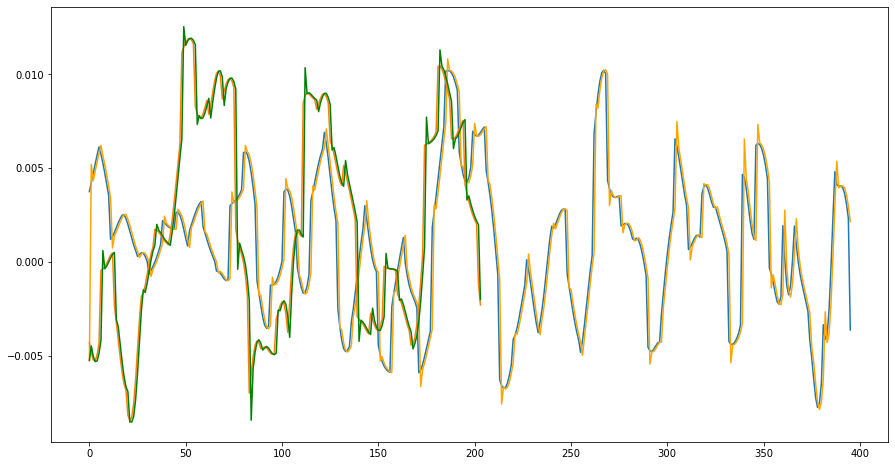

In [10]:
# plot forecasts against actual outcomes
pyplot.plot(train)
pyplot.plot(predictions1, color='orange')
pyplot.plot(test)
pyplot.plot(predictions, color='green')
pyplot.show()

In [11]:
dataset = pd.DataFrame(data=X)
#dataset['plot'] = 'Dataset'

Training = pd.DataFrame(data=predictions1)
#Training['plot'] = 'Training'

Prediction = pd.DataFrame(data=predictions)
#Prediction['plot'] = 'Prediction'

dataset , Training , Prediction ,dataset.shape , Training.shape , Prediction.shape


(            0
 0    0.003746
 1    0.004234
 2    0.004736
 3    0.005229
 4    0.005689
 ..        ...
 595  0.002511
 596  0.002247
 597  0.002037
 598 -0.001201
 599 -0.002291
 
 [600 rows x 1 columns],
             0
 0   -0.005250
 1    0.005193
 2    0.004326
 3    0.004829
 4    0.005321
 ..        ...
 391  0.004058
 392  0.003955
 393  0.003603
 394  0.002979
 395  0.002149
 
 [396 rows x 1 columns],
             0
 0   -0.005250
 1   -0.004475
 2   -0.005018
 3   -0.005313
 4   -0.005274
 ..        ...
 199  0.002737
 200  0.002432
 201  0.002182
 202  0.001984
 203 -0.002006
 
 [204 rows x 1 columns],
 (600, 1),
 (396, 1),
 (204, 1))

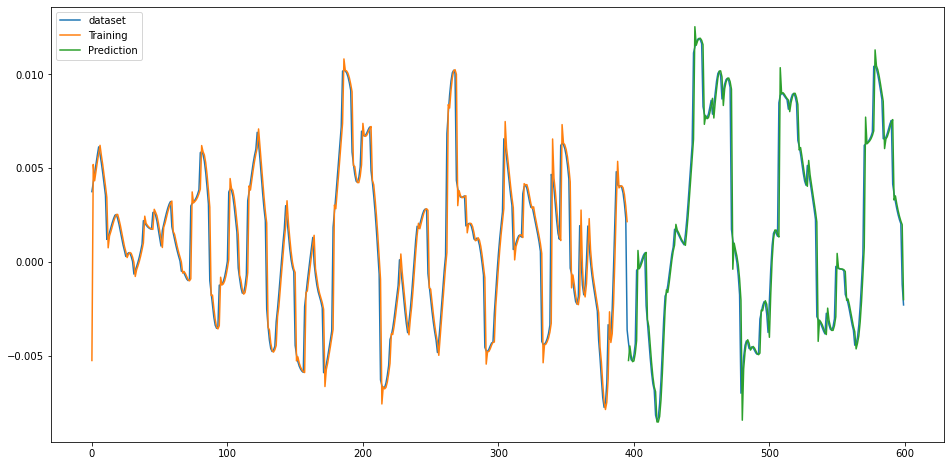

In [12]:
#dataset , Training , Prediction
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[:len(predictions1), :] = Training
trainPredictPlot

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(Training):len(X), :] = Prediction
# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.plot(dataset,label='dataset')
plt.plot(trainPredictPlot, label='Training')
plt.plot(testPredictPlot,label='Prediction')
plt.legend();
plt.savefig(figuredir + "ARIMA_Forcasting.png", bbox_inches='tight', dpi=1200)
plt.show()
